In [ ]:
# 왓슨 챗봇

In [1]:
!pip install nltk

You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
import nltk

In [3]:
#많은의미 내포하면서 좋은 의미가지거만 건지도록 피쳐쳐내ㅣ

In [4]:
from nltk.tokenize import sent_tokenize

In [5]:
nltk.download('punkt') ## . ? ! 이런거 분리

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\legen\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [6]:
import sqlite3

In [8]:
con = sqlite3.connect("news.db")
cur = con.cursor()

In [26]:
cur.execute("""
    SELECT content
    FROM table2
    ORDER BY id ASC
  
""")
corpus = [ _[0] for _ in cur.fetchall()]

In [30]:
corpus

['동영상 뉴스\n\n[앵커]\n\n이학수 전 삼성그룹 부회장이 오늘(17일) 이명박 전 대통령 재판에 증인으로 다시 나왔습니다. 검찰이 최근 다스의 미국 소송 비용을 삼성 측에서 대납해준 금액이 51억원 더 있다는 것을 발견을 했는데, 사실 여부를 확인하기 위해서입니다. 이 전 부회장은 "부탁받은대로 처리하라고 지시했다"고 선선히 인정했습니다.\n\n송우영 기자입니다.\n\n[기자]\n\n이학수 전 부회장은 지난 3월에 이어 두번 째로 증인석에 섰습니다.\n\n처음 증언에서는 다스가 미국에서 벌인 소송비용 68억원을 삼성에서 대신 내줬다는 것을 선선히 인정했습니다.\n\n이후 검찰은 삼성이 대신 내준 돈이 51억원 더 있다는 것을 발견했습니다.\n\n이 전 부회장은 51억원을 삼성이 내준 것이 이명박 전 대통령을 지원한다는 의미였냐는 질문에 "맞다"고 답했습니다.\n\n이 전 부회장은 당시 다스를 대리한 미국 로펌에 소속된 김석한 변호사가 두 번 찾아와 "삼성이 법률 비용을 대줬으면 좋겠다고 했다"고 밝혔습니다.\n\n특히 청와대에 소송 문제가 있는데 삼성이 지원해줬으면 좋겠고 이 전 대통령이 고맙게 생각하고 있다고 했다는 김 변호사 말을 공개했습니다.\n\n이 전 부회장은 이후 이 요청을 삼성전자 미국 법인이 처리하도록 지시했다고 진술했습니다.\n\n평소 삼성과 친분이 있던 김 변호사의 요청이니 별로 따져보지 않고 원하는 대로 처리해 주라고 했다는 것입니다.\n\n이 전 대통령 측은 "기업이 큰 돈을 내면서 내용과 금액도 확인하지 않고 줬다는 건 상식적이지 않다"며 "믿을 수 없다"고 반박했습니다.\n\n(영상디자인 : 강아람)\n\n송우영(Song.wooyeong@jtbc.co.kr) [영상취재: 이주원 / 영상편집: 이지훈]\n\n▶ JTBC 뉴스 제보하기 ▶ 놓친 \'뉴스룸\' 다시보기\n\n▶ 카카오톡 친구들에게 \'JTBC를 선물\'하세요!\n\nCopyright by JTBC(http://jtbc.joins.com) and JTBC Content

In [27]:
len(corpus)

35

In [28]:
len(corpus[0]), len(corpus[0].split()), len(corpus[0].splitlines())  ## 글자 갯수, 스페에스 단어, 개행 엔터

(1008, 222, 37)

In [29]:
from nltk.tokenize import sent_tokenize
len(sent_tokenize(corpus[0])) ## 문장단위로 토크나이징하니까 ㅈㄴ 줄어듬

16

In [38]:
corpus[0].splitlines()[0]

'동영상 뉴스'

In [39]:
sent_tokenize(corpus[0])[0]

'동영상 뉴스\n\n[앵커]\n\n이학수 전 삼성그룹 부회장이 오늘(17일) 이명박 전 대통령 재판에 증인으로 다시 나왔습니다.'

In [ ]:
sent_tokenize("MeCab") #리눅스에서만 쓸수있따.

In [43]:
sent_tokenize("Life is too short. holy sheet")

['Life is too short.', 'holy sheet']

In [44]:
from string import punctuation
punctuation  ## 이런애들 기반으로 자른다

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [47]:
sent_tokenize("""Life is too short!
                holy sheet""")

['Life is too short!', 'holy sheet']

In [49]:
sent_tokenize("""안녕 보이루....
                holy sheet""")

['안녕 보이루....\n                holy sheet']

In [ ]:
## 온라인 커뮤니티 구어체 이런데서는 못쓴다 하나의 문장을 완벽하게 구사 안한다. 

In [ ]:
## 문장 제대로 구분 안되면 동사 2개 막 이러고 구문분석 힘들다.

In [50]:
from nltk.tokenize import word_tokenize
word_tokenize("Life is too short, Life is too short.")  ## 어절단위로 하나의 단어에 하나으 

##   공백, 구두점., ' , '' 이런식으로 자름 => 이런걸 토큰(청크)이라 부른다.


## 음소  
## 음절 - 한글자
## 형태소
## 단어
## 어절
## 문장
## 문단

## 어절단위로 자르고 + 구두점

['Life', 'is', 'too', 'short', ',', 'Life', 'is', 'too', 'short', '.']

In [52]:
("Life is too short, Life is too short.").split()

['Life', 'is', 'too', 'short,', 'Life', 'is', 'too', 'short.']

In [54]:
len(word_tokenize(corpus[0])), len(sent_tokenize(corpus[0]))  ## 찾아낸 어절수는 증가, 문장 수는 감소


(278, 16)

In [55]:
from konlpy.tag import Kkma  ## 형태소분석 리눅스에서만

ModuleNotFoundError: No module named 'konlpy'

In [56]:
# kKMA().morphs(corpus[0])

In [61]:
from nltk.tokenize import TweetTokenizer  ## 외국에서는 =) 이런식으로 감정을 나타냄 주로 트위터에서

word_tokenize("You need Python =)")
TweetTokenizer().tokenize("You need Python =);(")

['You', 'need', 'Python', '=)', ';(']

In [70]:
import re
from nltk.tokenize import regexp_tokenize
pattern = re.compile(r"\b(\w+)\b") ##공백으로 구분되는 모든문자 즉 어절, 영어 숫자로만 이루어진
                                    # 텍스트처리 정규식 꼭알아야함  # 텍스트 버리면 비정형 거의다버리는거 쓸만한거 x
regexp_tokenize("You need Python!!!!!!! 한#@@$%글 12", pattern)


error: unterminated character set at position 3

In [75]:
pattern = re.compile(r"\b([가-힣])\b") 
regexp_tokenize("ㅜㅜ ㅋㅋYou need Python!!!!!!! 한#@@$%글 12", pattern) ## ㅜㅜ ㅋㅋ 이런거 안뽑힘


pattern2 = re.compile(r"\b([가-힣]+)\b")
regexp_tokenize(re.sub(r"[^ ㄱ-ㅎ ㅏ-ㅣ 가-힣]", "" , "ㅠㅠ ㅜㅜ ㅋㅋ 한#@#글"),pattern2)

['한', '글']

In [100]:

pattern2 = re.compile(r"\b([가-힣]+)\b")
regexp_tokenize(re.sub(r"[^ ㄱ-ㅎ ㅏ-ㅣ 가-힣]", "" , "ㅠㅠ ㅜㅜ ㅋㅋ 한#@#글"),pattern2)

['한글']

In [76]:
re.sub(r"[^가-힣]]", "", "ㅠㅠ ㅜㅜ ㅋㅋ 한~@#글")

'ㅠㅠ ㅜㅜ ㅋㅋ 한~@#글'

In [78]:
regexp_tokenize(
    re.sub(r"[^ㄱ-하-ㅏ-ㅣ가-힣]]", "", "ㅠㅠ ㅜㅜ ㅋㅋ 한~@#글",pattern))  ##

TypeError: '_sre.SRE_Pattern' object cannot be interpreted as an integer

In [80]:
from string import punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [86]:
from nltk import Text  #
text = Text(word_tokenize(corpus[0])) ## 통계내줌 , 많이언급, 같이나오는건뭔가


5개

2개


In [103]:
temp = "송환의 송환의 송환의 조민수 조민수 서동욱 서동욱 서동욱 서동욱"

ttest = Text(word_tokenize(temp))

In [105]:
ttest.vocab().B(), ttest.vocab().N()

(3, 9)

In [106]:
ttest.vocab()

FreqDist({'서동욱': 4, '송환의': 3, '조민수': 2})

In [87]:
text.vocab().B(), text.vocab().N()  # N 전체 인스턴스 개수, B 유니크한 애들, 키 벨류쌍 vocab

(192, 278)

In [99]:
text.vocab()

FreqDist({'!': 1,
          "'": 1,
          "''": 5,
          "'JTBC를": 1,
          "'뉴스룸": 1,
          '(': 4,
          ')': 4,
          ',': 2,
          '.': 14,
          '/': 1,
          '//jtbc.joins.com': 1,
          '17일': 1,
          '3월에': 1,
          '51억원': 2,
          '51억원을': 1,
          '68억원을': 1,
          ':': 4,
          '@': 1,
          'All': 1,
          'Co.': 1,
          'Content': 1,
          'Copyright': 1,
          'Hub': 1,
          'JTBC': 3,
          'Ltd.': 1,
          'Reserved': 1,
          'Rights': 1,
          'Song.wooyeong': 1,
          '[': 3,
          ']': 3,
          '``': 5,
          'and': 1,
          'by': 1,
          'http': 1,
          'jtbc.co.kr': 1,
          '▶': 3,
          '강아람': 1,
          '건': 1,
          '검찰은': 1,
          '검찰이': 1,
          '것을': 3,
          '것이': 1,
          '것입니다': 1,
          '고': 4,
          '고맙게': 1,
          '공개했습니다': 1,
          '금액도': 1,
          '금액이': 1,
        

In [88]:
text.vocab().most_common(30) # 가장 많은 빈도수 top 30   # 구두점은 필요가 없는데 살아있어서 필요 x

[('.', 14),
 ('전', 10),
 ('이', 7),
 ('부회장은', 5),
 ('``', 5),
 ("''", 5),
 ('(', 4),
 (')', 4),
 ('고', 4),
 ('삼성이', 4),
 (':', 4),
 ('[', 3),
 (']', 3),
 ('미국', 3),
 ('것을', 3),
 ('▶', 3),
 ('JTBC', 3),
 ('뉴스', 2),
 ('이학수', 2),
 ('이명박', 2),
 ('대통령', 2),
 ('소송', 2),
 ('비용을', 2),
 ('51억원', 2),
 ('더', 2),
 ('있다는', 2),
 (',', 2),
 ('선선히', 2),
 ('인정했습니다', 2),
 ('송우영', 2)]

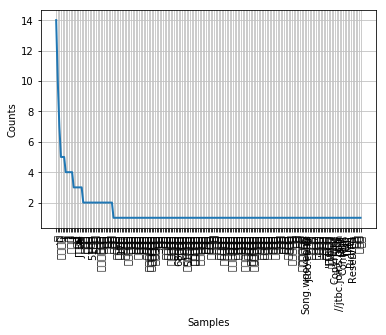

In [90]:
text.plot()   #  글자꺠는거 matplot rc 에서 포트설정 해주면됨 리소스매니저같은애 
              #  글자 생김이 다 비슷하다.Empirical Law

In [111]:
_[0] for _ in text.vocab()

SyntaxError: invalid syntax (<ipython-input-111-5918b794c85d>, line 1)

In [92]:
text.vocab().freq("대통령")  ## 상위 탑 개 들어가는 애들 비율이 나온다.

0.007194244604316547

In [107]:
ration = 0.0
for _ in [_[0] for _ in text.vocab().most_common(10)]:
    print(_)
    print("---")
    ration += text.vocab().freq(_)
    print(text.vocab().freq(_))
print(ration)

.
---
0.050359712230215826
전
---
0.03597122302158273
이
---
0.025179856115107913
부회장은
---
0.017985611510791366
``
---
0.017985611510791366
''
---
0.017985611510791366
(
---
0.014388489208633094
)
---
0.014388489208633094
고
---
0.014388489208633094
삼성이
---
0.014388489208633094
0.2230215827338129


In [162]:
###########33
largeText="\n".join(corpus)
text= Text(word_tokenize(largeText))

In [ ]:
text = Text(word_tokenize(corpus[0]))

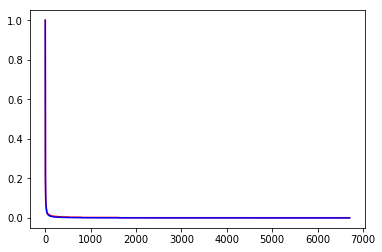

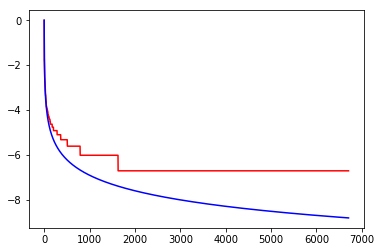

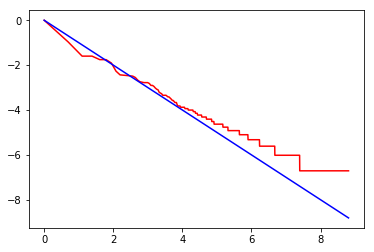

In [163]:
import matplotlib.pyplot as plt
from math import log
token = [_[0] for _ in sorted(text.vocab().items(), key=lambda x:x[1], reverse=True)]

freq = [_[1]/text.vocab().most_common(1)[0][1] for _ in sorted(text.vocab().items(), key=lambda x:x[1], reverse=True)]
_freq = [log(_) for _ in freq]

rank = [1/(_+1) for _ in range(len(token))]
_rank = [log(_) for _ in rank]

plt.plot([i for i in range(len(token))], freq, "r-")
plt.plot([i for i in range(len(token))], rank, "b-")
plt.show()

## 로그
plt.plot([i for i in range(len(token))], _freq, "r-")
plt.plot([i for i in range(len(token))], _rank, "b-")
plt.show()

## 로그
plt.plot([log(i+1) for i in range(len(token))], _freq, "r-")
plt.plot([log(i+1) for i in range(len(token))], _rank, "b-")
plt.show()

In [ ]:
## 빨간색이 순위그래프 // 파란색이 빈도수그래프



## 빨간색 그래프가 파란색이 근접해야한다. => 문서의 수를 늘리면 늘릴수록 매우 근접해진다.
## 애를 가지고 줄여버리면 to be or not to be  애네도 날라감 문장 구성 성분중 중요성분 be 동사 이런거 날리면 꺠진다 => context 문맥이 꺠진다. 어떤 모델을 쓰냐에 따라 전처리 방식이 달라져야한다
# word 임베딩을 하고싶으면 최대한 날려야한다 문맥정보가 필요가 없으므로



In [ ]:
## log씌우면 선형관계를 가진다.


In [ ]:
from 

In [135]:
K = 10 #10 ~ 100
B = 0.4 #0.4 - 0.6
unique = list()
total = list()
heaps = list()
largeText = ""
for _ in corpus:
    largeText += _
    text = Text(largeText)
    unique.append(text.vocab().B())
    total.append(text.vocab().N())
    
    heaps.append(K*text.vocab().N()**B)

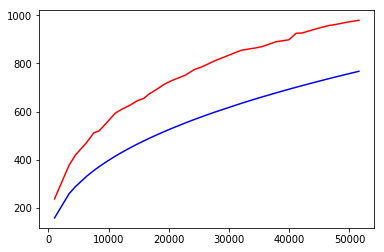

In [136]:
plt.plot(total, unique, "r-")
plt.plot(total, heaps, "b-")

plt.show()

In [ ]:
## 경험적인 법칙을 바탕으로 움직이는구나! 이걸암

# 단어의 갯수가 무한정 늘어난다해서 피쳐가 들어나는거 x
# 얼만큼의 데이터 규모, 복잡성, => 어느정도 복잡성 필요한지 그래프 보면서 대충 파악해봐라 요느낌

In [137]:
sentence = "Life is too short, You need Python"
N = 2
Pythone?
P(Python | need )
P(Python | need)
P(need | You)

SyntaxError: invalid syntax (<ipython-input-137-2e356af13f5a>, line 1)

In [ ]:
## 이미 데이터가 있을떄 이 데이터가 어떻게 생겼는지 추측하는데에 엔그램 더많이쓰임

## 아버지가, 아버지를, 아버지께서
## 아버지 + 가
## 엔그램으로
## 이사람이 ㅅ ㅜ ㄹ  이러면 디비화해서 맞춤형으로 다음 뭐쓸지 추천//   카톡 문장자동완성 이런거 검색어 자동완성 등
##
## 의료기구 단어 끝까지 완성시키기 힘든데 평상시 썻던 글, 언어패턴 분석해서 맞춤형으로 최적화해서 다음단어 에측 추천 이런거 가능

In [157]:
sentence = "Life is too short, You need Python"
def eojeol(sentence, N=2):
    tokens = word_tokenize(sentence) ## 토큰 갯수 가지고 n개 생성
    ngram = list()
    for i in range(len(tokens)-(N-1)):
        ngram.append(tuple(tokens[i:i+N]))
    return ngram

eojeol(sentence,3)


def umjeol(token, N=2):
    tokens = list(token)
    ngram = list()
    for i in range(len(tokens)-(N-1)):
        ngram.append("".join(tokens[i:i+N]))
        #ngram.append(tuple(tokens[i:i+N]))
    return ngram

eojeol(sentence,3)
print()

umjeol(corpus[0].splitlines()[0])
umjeol(corpus[0])
## 꼭 다음단어 예측하는거 아니더라도
## 얼마나 스테밍하는지 어간을 분리할지 모를떄 어간 대신 쓸수 있따.  언어 생성(너무많은 데이터 잘안됨 0에 근접할거임), 언어 이해, 어간추출에 대한 방법으로 봐도좋다. 엔그램으로 피쳐를 어떻게 생성할건지 고르면 됨 
## 단점 엄청나게 많은쌍을 만들어냄 

['동영',
 '영상',
 '상 ',
 ' 뉴',
 '뉴스',
 '스\n',
 '\n\n',
 '\n[',
 '[앵',
 '앵커',
 '커]',
 ']\n',
 '\n\n',
 '\n이',
 '이학',
 '학수',
 '수 ',
 ' 전',
 '전 ',
 ' 삼',
 '삼성',
 '성그',
 '그룹',
 '룹 ',
 ' 부',
 '부회',
 '회장',
 '장이',
 '이 ',
 ' 오',
 '오늘',
 '늘(',
 '(1',
 '17',
 '7일',
 '일)',
 ') ',
 ' 이',
 '이명',
 '명박',
 '박 ',
 ' 전',
 '전 ',
 ' 대',
 '대통',
 '통령',
 '령 ',
 ' 재',
 '재판',
 '판에',
 '에 ',
 ' 증',
 '증인',
 '인으',
 '으로',
 '로 ',
 ' 다',
 '다시',
 '시 ',
 ' 나',
 '나왔',
 '왔습',
 '습니',
 '니다',
 '다.',
 '. ',
 ' 검',
 '검찰',
 '찰이',
 '이 ',
 ' 최',
 '최근',
 '근 ',
 ' 다',
 '다스',
 '스의',
 '의 ',
 ' 미',
 '미국',
 '국 ',
 ' 소',
 '소송',
 '송 ',
 ' 비',
 '비용',
 '용을',
 '을 ',
 ' 삼',
 '삼성',
 '성 ',
 ' 측',
 '측에',
 '에서',
 '서 ',
 ' 대',
 '대납',
 '납해',
 '해준',
 '준 ',
 ' 금',
 '금액',
 '액이',
 '이 ',
 ' 5',
 '51',
 '1억',
 '억원',
 '원 ',
 ' 더',
 '더 ',
 ' 있',
 '있다',
 '다는',
 '는 ',
 ' 것',
 '것을',
 '을 ',
 ' 발',
 '발견',
 '견을',
 '을 ',
 ' 했',
 '했는',
 '는데',
 '데,',
 ', ',
 ' 사',
 '사실',
 '실 ',
 ' 여',
 '여부',
 '부를',
 '를 ',
 ' 확',
 '확인',
 '인하',
 '하기',
 '기 ',
 ' 위',
 '위해',
 '해서',
 '서입'

In [144]:
from collections import defaultdict

freq = defaultdict(int)
for _ in eojeol(corpus[0]):
    freq[_] += 1

In [145]:
freq

defaultdict(int,
            {('!', 'Copyright'): 1,
             ("'", '다시보기'): 1,
             ("''", '고'): 4,
             ("''", '며'): 1,
             ("'JTBC를", "선물'하세요"): 1,
             ("'뉴스룸", "'"): 1,
             ('(', '17일'): 1,
             ('(', 'Song.wooyeong'): 1,
             ('(', 'http'): 1,
             ('(', '영상디자인'): 1,
             (')', '['): 1,
             (')', 'and'): 1,
             (')', '송우영'): 1,
             (')', '이명박'): 1,
             (',', 'Ltd.'): 1,
             (',', '사실'): 1,
             ('.', '('): 1,
             ('.', '['): 1,
             ('.', '검찰이'): 1,
             ('.', '무단'): 1,
             ('.', '송우영'): 1,
             ('.', '이'): 5,
             ('.', '이후'): 1,
             ('.', '처음'): 1,
             ('.', '특히'): 1,
             ('.', '평소'): 1,
             ('/', '영상편집'): 1,
             ('//jtbc.joins.com', ')'): 1,
             ('17일', ')'): 1,
             ('3월에', '이어'): 1,
             ('51억원', '더'): 2,
             ('51억원을', 

In [146]:
sorted(freq.items(), key=lambda x:x[1], reverse=True)[:10]

[(('이', '전'), 6),
 (('.', '이'), 5),
 (('전', '부회장은'), 5),
 (("''", '고'), 4),
 ((']', '이학수'), 2),
 (('이학수', '전'), 2),
 (('이명박', '전'), 2),
 (('전', '대통령'), 2),
 (('51억원', '더'), 2),
 (('더', '있다는'), 2)]

In [148]:
freq[('이', '전')]/sum(freq.values())


0.021660649819494584

In [150]:
freq[('.', '이')]/freq[(('이', '전'))]

0.8333333333333334

In [151]:
[_ for _ in freq if _[1] == "전"]

[('이학수', '전'), ('이명박', '전'), ('이', '전')]

In [ ]:
P("이") ?
P("이" | "전")
P("전" | "부회장은")
P("부회장은")

In [ ]:
####### 불용어 처리

In [159]:
nltk.download('stopwords') ## . ? ! 이런거로 분리

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\legen\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [161]:
from nltk.corpus import stopwords
print(stopwords.open("english").read())

i
me
my
myself
we
our
ours
ourselves
you
you're
you've
you'll
you'd
your
yours
yourself
yourselves
he
him
his
himself
she
she's
her
hers
herself
it
it's
its
itself
they
them
their
theirs
themselves
what
which
who
whom
this
that
that'll
these
those
am
is
are
was
were
be
been
being
have
has
had
having
do
does
did
doing
a
an
the
and
but
if
or
because
as
until
while
of
at
by
for
with
about
against
between
into
through
during
before
after
above
below
to
from
up
down
in
out
on
off
over
under
again
further
then
once
here
there
when
where
why
how
all
any
both
each
few
more
most
other
some
such
no
nor
not
only
own
same
so
than
too
very
s
t
can
will
just
don
don't
should
should've
now
d
ll
m
o
re
ve
y
ain
aren
aren't
couldn
couldn't
didn
didn't
doesn
doesn't
hadn
hadn't
hasn
hasn't
haven
haven't
isn
isn't
ma
mightn
mightn't
mustn
mustn't
needn
needn't
shan
shan't
shouldn
shouldn't
wasn
wasn't
weren
weren't
won
won't
wouldn
wouldn't



In [158]:
## WPN 
## 어간을 어떻게 추출할건지에 대한 방법
## 구글 번역기 성능
# 좋은 모델 + 앞단 단어들에 대한 의미 표현 pretrained(1억개) 잘 학습시켜놈
## 언어가 다르면 문법도 다름 

## 어간을 줄이면 서치스페이스 줄이고 머신이 좀더 똒똒해짐 => wpm 
# wpm 근간 논문 byte pair encoding => 어간추출 가능

In [ ]:
### 어미를 분리하고 어근을 추출하는 bpe 가 어떻게 하는지를 봄
## 아버지를 아버지가 아버지는 등등 lower lowest 여기 뒤에 붙은 어미를 빈도수에 따라 잘라버린다.
## 단어 들어오면 다 분리한다음 l, o, w 한다음 빈도수에 따라 lo, low 이렇게 합쳐나가면서 어간을 추출한다.


In [ ]:
tokens = {
    "l o w </w>" :  5, 
    "l o w e s t </w>" : 2,
    "n e w e r </w>" : 6,
    "r i d e r </w>" : 3
}
for _ in range(5): ## 많이 돌수록 다합쳐짐, low랑 er, new 찾아짐
    maxKey = findBigram(tokens)
    tokens = mergeMaxkey(maxKey, tokens)
tokens

In [ ]:
# Normalization

# 앞에서 단어를 다쪼개면 정형화된 틀로 만들어서 넣어줘야한다.(대소문자 이런거)
# 이게 불용어 처리
# 단어에 끝에 는 </w> 붙인다.

In [ ]:
# 빈도를 기반 어간 추출

In [336]:
tokens = {
    "l o w </w>": 5,
    "l o w e s t </w>":2,
    "n e w e r </w>":6,
    "r i d e r </w> ":3   
}

tokens = {
    "아 버 지 가 </w>" : 5,
    "아 버 지 계 서 </w>" : 2,
    "아 버 지 를 </w>":6,
    "아 버 지 에 게 </w>" :3
}
# max(tokens, key=tokens.get)

K = max(tokens.values())

for _ in range(100):
    maxKey=findBigram(tokens)
    tokens=mergeMaxkey(maxKey,tokens, K)
    

pattern = r"[A-Za-z\/\<\>]{2,}"
pattern = r"[가-힣A-Za-z\/\<\>]{2,}"
result=list()
for _ in tokens:
    result.extend([_ for _ in re.findall(pattern, _) if _!="</w>"])
   # print([_ for _ in re.findall(pattern, _) if _!="</w>"])
set(result)     

{'</w', '아버지'}

In [332]:
def findBigram(tokens):
    ngram = defaultdict(int)
    for token, freq in tokens.items():
        syllables=token.split()
        for i in range(len(syllables)-1):
            ngram[tuple(syllables[i:i+2])] += freq
    return ngram

In [333]:
def mergeMaxkey(ngram,tokens,K):
    maxKey = max(ngram , key=ngram.get)

    maxValue = max(ngram.values())
    newTokens=dict()
    for token,freq in tokens.items():
        newTokens[re.sub(" ".join(maxKey), "".join(maxKey), token) if maxValue > K else token] = freq
        #newTokens[token if freq <= K else re.sub(" ".join(maxKey),"".join(maxKey),token)] = freq
    #print(maxKey)
    return newTokens

[]
[]
[]
[]


set()

In [ ]:
## 최종적으로 3개의 어간을 찾아냄 이터레이션 6번 돌렸을때

## 이터레이션을 돌리면 돌릴수록 단어가 다 붙는데

In [275]:
newTokens, maxKey

({'low</w>': 5, 'lowest</w>': 2, 'newer</w>': 6, 'ride r</w>': 2},
 ('rid', 'e'))